In [24]:
import matplotlib.pyplot as plt
from matplotlib import container
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [25]:
incentive_list = [0.2, 0.4, 0.6, 0.8]
data_folder = r"E:\data\dao-0310-23\V5_interaction\Threshold_incentive_4_low_activeness"
performance_list, diversity_list, variance_list = [], [], []
for incentive in incentive_list:
    dao_performance_file_1 = data_folder + r"\dao_performance_across_threshold_{0}".format(incentive)
    dao_diversity_file_1 = data_folder + r"\dao_diversity_across_threshold_{0}".format(incentive)
    dao_variance_file_1 = data_folder + r"\dao_variance_across_threshold_{0}".format(incentive)

    with open(dao_performance_file_1, 'rb') as infile:
        dao_performance_1 = pickle.load(infile)
    with open(dao_variance_file_1, 'rb') as infile:
        dao_variance_1 = pickle.load(infile)
    with open(dao_diversity_file_1, 'rb') as infile:
        dao_diversity_1 = pickle.load(infile)
    
    performance_list.append(dao_performance_1)
    variance_list.append(dao_variance_1)
    diversity_list.append(dao_diversity_1)

dao_reference_file = r"E:\data\dao-0310-23\V4_4\Threshold\dao_performance_across_threshold"
with open(dao_reference_file, 'rb') as infile:
    dao_reference = pickle.load(infile)

In [26]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

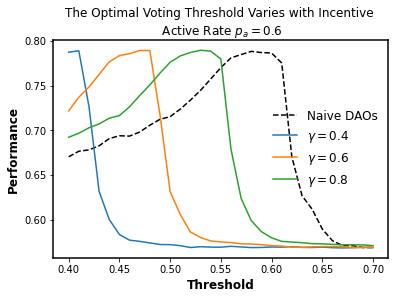

In [30]:
# Performance
x = np.arange(0.40, 0.71, 0.01)
fig, (ax) = plt.subplots(1, 1)
ax.plot(x, dao_reference, "--", color="k", label="Naive DAOs")
ax.plot(x, performance_list[1], "-", label="$\\gamma=0.4$")
ax.plot(x, performance_list[2], "-", label="$\\gamma=0.6$")
ax.plot(x, performance_list[3], "-", label="$\\gamma=0.8$")
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.xlabel('Threshold', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.title("The Optimal Voting Threshold Varies with Incentive \n Active Rate $p_a=0.6$")
plt.savefig(data_folder + r"\Performance_across_threshold_incentive.png", transparent=True, dpi=300)
plt.show()